# 5-6 Pytorch-Seq2Seq(Attention) - 簡易中英翻譯
整篇是參考[Pytorch实现Seq2Seq（Attention）字符级机器翻译](https://blog.csdn.net/qq_41335232/article/details/124203616)來進行

### Dataset
reference提供的資料庫: [Dataset: 中英平行语料小型数据集](https://download.csdn.net/download/qq_41335232/85142675)



### 中英文-文字配對<br>
Dataset內有一個檔案 (dataset.xlsx)<br>
### 文字數字化
```ch.vec```: 中文數字化編碼檔案<br>
```en.vec```: 英文數字化編碼檔案<br>

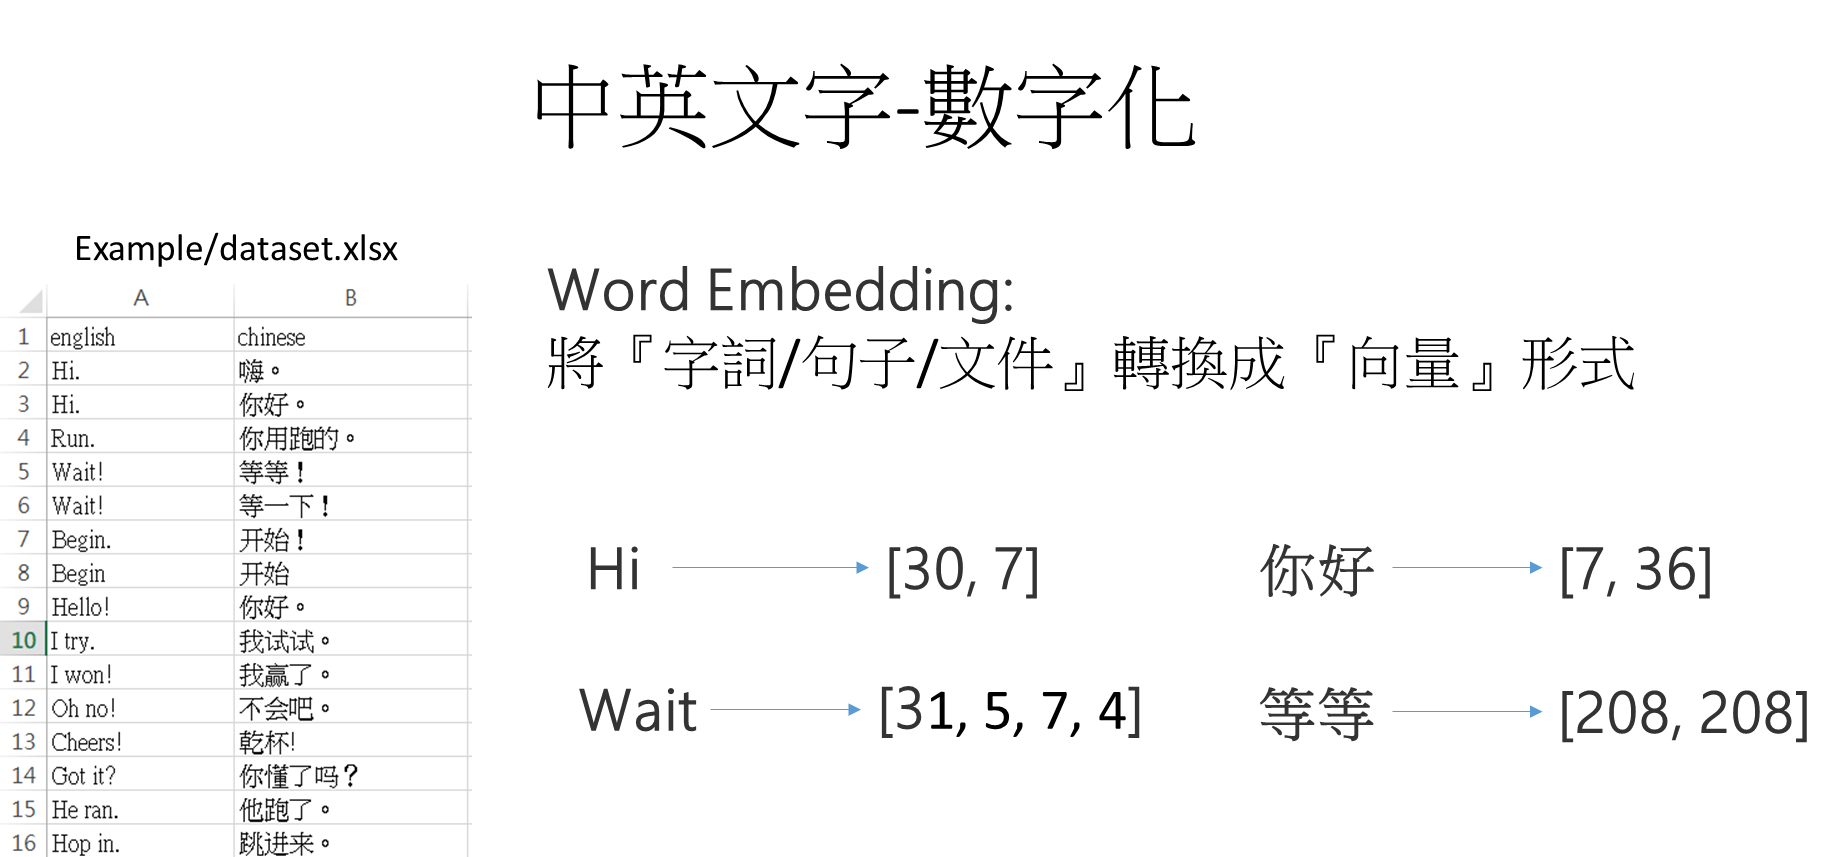

### 建立Tokenizer模組進行文字編碼

In [1]:
import pickle
class Tokenizer:
    def __init__(self, vocab_path, is_en=True):
        with open(vocab_path,'rb') as f:
            _, word2index, index2word = pickle.load(f)
        if is_en: 
            word2index = {word: index + 1 for word, index in word2index.items()}
            word2index.update({"<PAD>":0})
            index2word = ["<PAD>"] + index2word
        else:
            word2index = {word: index + 3 for word, index in word2index.items()}
            word2index.update({"<PAD>":0, "<BOS>": 1, "<EOS>":2})
            index2word = ["<PAD>", "<BOS>", "<EOS>"] + index2word
        self.word2index = word2index
        self.index2word = index2word
        self.PAD = 0
        self.BOS = 1
        self.EOS = 2
    
    def encode(self, sentence):
        return [self.word2index[w] for w in sentence]
    
    def decode(self, indexes):
        return [self.index2word[index] for index in indexes]

    def length(self):
        return len(self.index2word)

In [2]:
print('English Encoding')
tokenizer_en = Tokenizer(vocab_path="./dataset/en.vec", is_en=True)
print(tokenizer_en.encode("hello,world!"))
print(tokenizer_en.encode("hello, world!"))
print(tokenizer_en.encode("hello,National Taichung Uiveristy of Education!"))
print(tokenizer_en.encode("hello,Chih-Sheng Huang"))

print('Chinese Encoding')
tokenizer_cn = Tokenizer(vocab_path="./dataset/ch.vec", is_en=False)
print(tokenizer_cn.encode("你好, 世界!"))
print(tokenizer_cn.encode("你好,世界!"))
print(tokenizer_cn.encode("你好,台中教育大學"))
print(tokenizer_cn.encode("你好,黃志勝"))

English Encoding
[9, 2, 11, 11, 3, 33, 17, 3, 10, 11, 12, 52]
[9, 2, 11, 11, 3, 33, 1, 17, 3, 10, 11, 12, 52]
[9, 2, 11, 11, 3, 33, 48, 5, 4, 7, 3, 8, 5, 11, 1, 27, 5, 7, 19, 9, 14, 8, 18, 1, 61, 7, 26, 2, 10, 7, 6, 4, 16, 1, 3, 20, 1, 41, 12, 14, 19, 5, 4, 7, 3, 8, 52]
[9, 2, 11, 11, 3, 33, 40, 9, 7, 9, 54, 32, 9, 2, 8, 18, 1, 30, 14, 5, 8, 18]
Chinese Encoding
[7, 36, 389, 270, 351, 494, 923]
[7, 36, 389, 351, 494, 923]
[7, 36, 389, 586, 125, 299, 960, 63, 137]
[7, 36, 389, 2330, 1285, 816]


In [3]:
print(tokenizer_en.encode("Hi"))
print(tokenizer_en.encode("Oh"))
print(tokenizer_en.encode("hello,world!"))
print(tokenizer_en.encode("hello"))
print(tokenizer_en.encode("h"))
print(tokenizer_en.encode("e"))
print(tokenizer_en.encode("l"))
print(tokenizer_en.encode("Wait"))

[30, 7]
[51, 9]
[9, 2, 11, 11, 3, 33, 17, 3, 10, 11, 12, 52]
[9, 2, 11, 11, 3]
[9]
[2]
[11]
[31, 5, 7, 4]


In [4]:
print(tokenizer_cn.encode("你好, 世界!"))
print(tokenizer_cn.encode("你"))
print(tokenizer_cn.encode("好"))
print(tokenizer_cn.encode(","))
print(tokenizer_cn.encode(" "))
print(tokenizer_cn.encode("世"))
print(tokenizer_cn.encode("界"))
print(tokenizer_cn.encode("!"))
print(tokenizer_cn.encode("等等"))

[7, 36, 389, 270, 351, 494, 923]
[7]
[36]
[389]
[270]
[351]
[494]
[923]
[208, 208]


In [5]:
tokenizer_en.word2index

{' ': 1,
 'e': 2,
 'o': 3,
 't': 4,
 'a': 5,
 's': 6,
 'i': 7,
 'n': 8,
 'h': 9,
 'r': 10,
 'l': 11,
 'd': 12,
 '.': 13,
 'u': 14,
 'm': 15,
 'y': 16,
 'w': 17,
 'g': 18,
 'c': 19,
 'f': 20,
 'p': 21,
 'I': 22,
 'b': 23,
 'k': 24,
 "'": 25,
 'v': 26,
 'T': 27,
 '?': 28,
 '"': 29,
 'H': 30,
 'W': 31,
 'S': 32,
 ',': 33,
 'M': 34,
 'Y': 35,
 'D': 36,
 'A': 37,
 'x': 38,
 'j': 39,
 'C': 40,
 'E': 41,
 'P': 42,
 'q': 43,
 'L': 44,
 'F': 45,
 'B': 46,
 'z': 47,
 'N': 48,
 '0': 49,
 'J': 50,
 'O': 51,
 '!': 52,
 'G': 53,
 '-': 54,
 '1': 55,
 'K': 56,
 'V': 57,
 'R': 58,
 '3': 59,
 '2': 60,
 'U': 61,
 '5': 62,
 '9': 63,
 '8': 64,
 '6': 65,
 ':': 66,
 '4': 67,
 '7': 68,
 '$': 69,
 'Z': 70,
 'Q': 71,
 '%': 72,
 '+': 73,
 'ū': 74,
 '’': 75,
 'é': 76,
 'ō': 77,
 '<PAD>': 0}

In [6]:
# tokenizer_cn.word2index
len(tokenizer_cn.index2word)

3592

In [7]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
from torch.nn.utils.rnn import  pad_sequence
import pandas as pd

class MyDataset(Dataset):
    def __init__(self, dataset_path , en_tokenizer, cn_tokenizer, nums=None):
        en_data, cn_data = self.get_data(dataset_path, nums=nums)
        self.en_data = en_data
        self.cn_data = cn_data
        self.en_tokenizer = en_tokenizer
        self.cn_tokenizer = cn_tokenizer
    
        
    def __getitem__(self, index):
        en = self.en_data[index]
        en = en.lower()
        cn = self.cn_data[index]
        en_index = self.en_tokenizer.encode(en)
        cn_index = self.cn_tokenizer.encode(cn)
        return en_index, cn_index, en, cn
    
    def __len__(self):
        assert len(self.en_data)==len(self.cn_data)
        return len(self.cn_data) 
    
    def collate_fn(self, batch_first):
        en_indices, cn_indices = [],[]
        enPAD = self.en_tokenizer.PAD
        cnPAD = self.cn_tokenizer.PAD
        BOS = self.cn_tokenizer.BOS
        EOS = self.cn_tokenizer.EOS
        ens, cns =[],[]
        for en_index, cn_index, en, cn in batch_first:
            en_indices.append(torch.tensor(en_index))
            cn_indices.append(torch.tensor([BOS] + cn_index + [EOS]))
            ens.append(en)
            cns.append(cn)
        en_indices = pad_sequence(en_indices, batch_first=True,padding_value=enPAD)
        cn_indices = pad_sequence(cn_indices, batch_first=True,padding_value=cnPAD)
        if not batch_first:
            en_indices = en_indices.transpose(0,1)
            cn_indices = cn_indices.transpose(0,1)
        return en_indices, cn_indices, ens, cns
    
    @staticmethod
    def get_data(dataset_path, nums=None):
        all_data = pd.read_csv(dataset_path)
        en_data = list(all_data["english"])
        cn_data = list(all_data["chinese"])
        if nums is None:
            return en_data, cn_data
        else:
            return en_data[:nums], cn_data[:nums]
    
en_tokenizer = Tokenizer(vocab_path="./dataset/en.vec", is_en=True)
cn_tokenizer = Tokenizer(vocab_path="./dataset/ch.vec", is_en=False)    
dataset = MyDataset('./dataset/translate.csv', en_tokenizer, cn_tokenizer, nums=None)
dataloader = DataLoader(dataset,
                     batch_size=2, num_workers=0, 
                     collate_fn = dataset.collate_fn,
                     shuffle=False)

for en_index, cn_index, ens, cns in dataloader:
    print(en_index)
    print(en_index.shape)
    print(cn_index)
    print(cn_index.shape)
    print(ens)
    print(cns)

    break


tensor([[ 9,  7, 13],
        [ 9,  7, 13]])
torch.Size([2, 3])
tensor([[   1, 2088,    3,    2,    0],
        [   1,    7,   36,    3,    2]])
torch.Size([2, 5])
['hi.', 'hi.']
['嗨。', '你好。']


## 建構模型 RNN-based

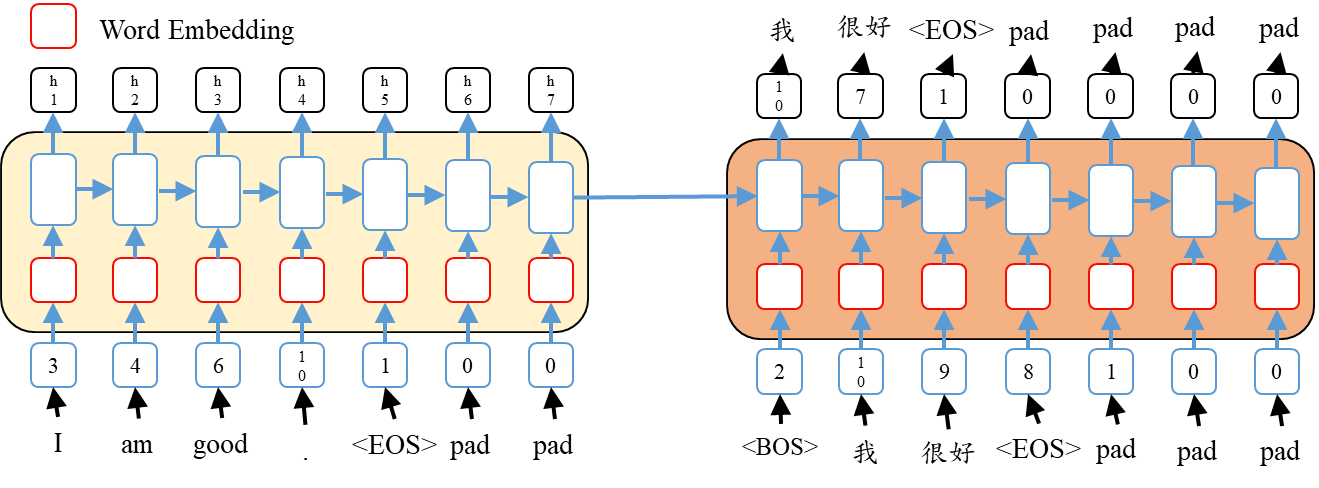

In [8]:
import torch.nn as nn
class Encoder(nn.Module):
    def __init__(self, encoder_embedding_num, encoder_hidden_num, en_vocab_size):
        super().__init__()
        self.embedding = nn.Embedding(en_vocab_size, encoder_embedding_num)
        self.rnn = nn.GRU(encoder_embedding_num, encoder_hidden_num, batch_first=True) # batch*ch*H*w → batch * order * dimesnion
        
    def forward(self, en_index):
        en_embedding = self.embedding(en_index)
        encoder_output, encoder_hidden = self.rnn(en_embedding)
        return encoder_output, encoder_hidden 
    
class Decoder(nn.Module):
    def __init__(self, decoder_embedding_num, decoder_hidden_num, cn_vocab_size):
        super().__init__()
        self.embedding = nn.Embedding(cn_vocab_size, decoder_embedding_num)
        self.rnn = nn.GRU(decoder_embedding_num, decoder_hidden_num, batch_first=True)
        
    def forward(self, decoder_input, hidden):
        embedding = self.embedding(decoder_input)
        decoder_output, dencoder_hidden = self.rnn(embedding, hidden)
        return decoder_output, dencoder_hidden 

## 建構模型: Self-Attention based Decoder

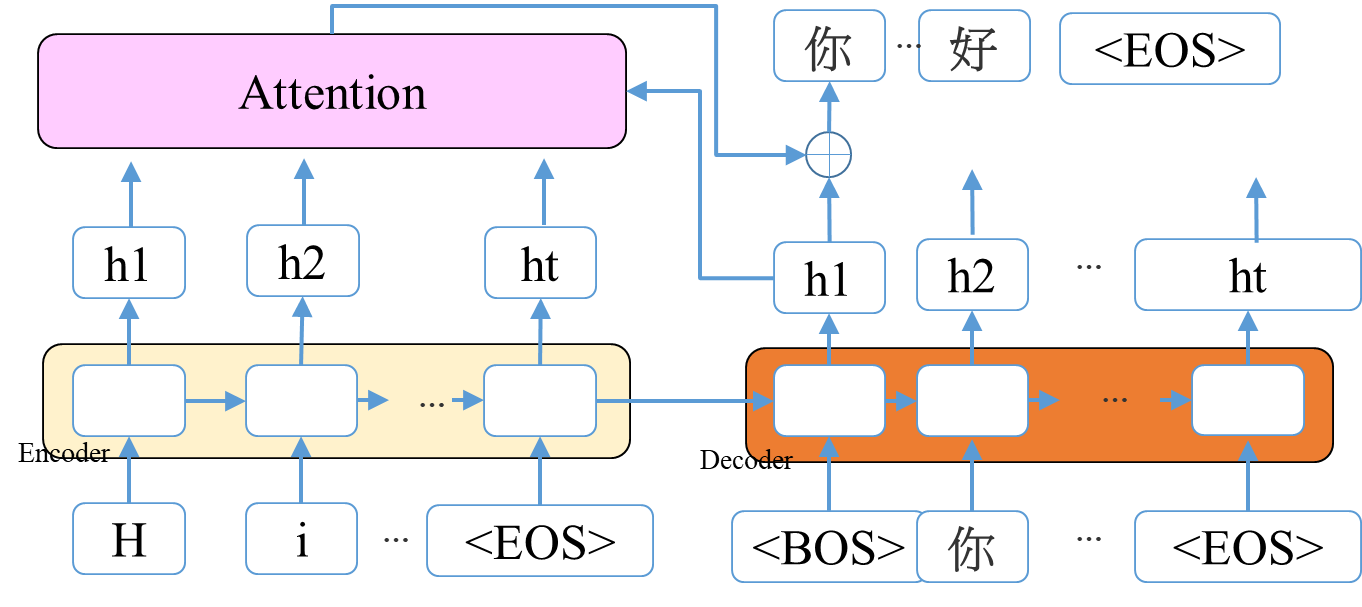

In [9]:

class AttentionBlock(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, decoder_state_t, encoder_outputs):
        b,s,h=encoder_outputs.shape
        attention_scores = torch.sum(
            torch.tile(decoder_state_t.unsqueeze(dim=1), dims=(s,1)) * encoder_outputs
            , dim=-1)
        
        attention_scores = torch.softmax(attention_scores, dim=-1)
        context = torch.sum(attention_scores.unsqueeze(dim=-1) * encoder_outputs
                           ,dim=1)
        return context, attention_scores 
    
    
class AttentionDecoder(nn.Module):
    def __init__(self, 
                 decoder_embedding_num, 
                 decoder_hidden_num, 
                 cn_vocab_size,
                 drop_rate = 0.3):
        super().__init__()
        
        self.embedding = nn.Embedding(cn_vocab_size, decoder_embedding_num)
        self.gru = nn.GRUCell(decoder_embedding_num, decoder_hidden_num)
        self.attention = AttentionBlock()
        self.dropout = nn.Dropout(drop_rate)
        
    def forward(self, decoder_input, encoder_hidden, encoder_output):
        embeded = self.embedding(decoder_input)
        b,s,h = embeded.shape
        ht = encoder_hidden[0]
        decoder_output=[]
        for t in range(s):
            decoder_input = embeded[:,t,:]
            ht = self.gru(decoder_input, ht)
            context, attention_probs = self.attention(ht, encoder_output)
            ht = self.dropout(ht)
            yt = torch.cat((ht,context), dim=-1)
            decoder_output.append(yt)
        decoder_output = torch.stack(decoder_output,dim=0)
        decoder_output = decoder_output.transpose(0,1)
        return decoder_output      
    

Seq2Seq

In [10]:
class Seq2Seq_Model(nn.Module):
    def __init__(self, 
               encoder_embedding_num, encoder_hidden_num, en_vocab_size,
               decoder_embedding_num, decoder_hidden_num, cn_vocab_size,
               project_size=3592,
               dropout_rate=0.3):
        super(Seq2Seq_Model, self).__init__()

        self.encoder = Encoder(encoder_embedding_num, 
                               encoder_hidden_num, 
                               en_vocab_size)
        self.decoder = AttentionDecoder(decoder_embedding_num, 
                                        decoder_hidden_num, 
                                        cn_vocab_size,
                                        dropout_rate)
        
        self.project = nn.Linear(4*decoder_embedding_num, project_size)
    def forward(self, en_index, cn_index):
        encoder_outputs, encoder_hidden = self.encoder(en_index)
        decoder_outputs = self.decoder(cn_index, encoder_hidden, encoder_outputs)
        ft = self.project(decoder_outputs)
        return ft
    
    def inference(self, sentence, en_tokenizer, cn_tokenizer, max_length=50):
        sentence = sentence.lower()
        with torch.no_gard():
            en_index = en_tokenizer.encode(sentence)
            encoder_outputs, encoder_hidden = self.encoder(en_index)
            decoder_inpit  = torch.tensor([[self.cn_tokenizer.BOS]])
            ht = encoder_hidden[0]
            predictions = []
            for t in range(max_length):
                embed = self.decoder.embedding(decoder_input)[:,0,:]
                ht = self.decoder.gru(embed, ht)
                context,_=self.decoder.attention(ht, encoder_output)
                yt = torch.cat((ht, context), dim=-1)
                pred = self.project(yt)
                w_index = int(torch.argmax(pred, dim=-1))
                word = self.cn_tokenizer.decode(w_index)
                if word =="<EOS>":
                    break
                predictions.append(word)
                decoder_input =torch.tensor([[w_index]])
            return "".join(predictions)
        
        
        

In [11]:
import torch
import torch.nn as nn
import torch
import numpy as np
from torch.utils.data import   SequentialSampler
from torch.utils.data import DataLoader
import os
def train_val_split(dataset, batch_size, num_worker, validation_split=0.1):
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    indx_train, indx_val = indices[split:], indices[:split]
    
    train_sampler =  SequentialSampler(indx_train)
    valid_sampler =  SequentialSampler(indx_val)
    train_loader = DataLoader(dataset, 
                              sampler = train_sampler,
                              batch_size= batch_size,
                              collate_fn = dataset.collate_fn)
    valid_loader = DataLoader(dataset, 
                              sampler = valid_sampler,
                              batch_size= batch_size,
                              collate_fn = dataset.collate_fn)
    return train_loader, valid_loader


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(device)
encoder_embedding_size = 128
decoder_embedding_size = 128
hidden_size = 256

batch_size=128
lr = 1e-3
lr_gamma = 0.99
epochs = 100
batch_first= True
num_workers=0
nums=None



en_tokenizer = Tokenizer('./dataset/en.vec', is_en=True)
cn_tokenizer = Tokenizer('./dataset/ch.vec', is_en=False)
dataset = MyDataset('./dataset/translate.csv', 
                    en_tokenizer, 
                    cn_tokenizer,
                    nums=nums,
                   )
train_loader, valid_loader = train_val_split(dataset, batch_size, num_workers)


model = Seq2Seq_Model(encoder_embedding_size, hidden_size, en_tokenizer.length(),
               decoder_embedding_size, hidden_size, cn_tokenizer.length(),
               dropout_rate=0.1)




model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(),lr = lr)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.99 )
loss_ce = nn.CrossEntropyLoss()
loss_ce.to(device)
record_loss = []
print('total # of batch:{}'.format(len(train_loader)))
for e in range(100):
    print('training start')
    print('----------')
    print('Epoch:{}'.format(e))
    model.train()
    for i, (en_index, cn_index,_,_) in enumerate(train_loader):
        en_index=en_index.to(device)
        cn_index=cn_index.to(device)
        pred = model(en_index, cn_index[:,:-1] if batch_first else cn_index[-1])
        label = (cn_index[:,1:] if batch_first else cn_index[1:]).to(device)
        loss = loss_ce(pred.reshape(-1,pred.shape[-1]), label.reshape(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        record_loss.append(loss.item())
        if i%100==0:
            print('iter:{}, loss:{}'.format(i, loss))
    scheduler.step()
        

    
    

cuda
total # of batch:186
training start
----------
Epoch:0
iter:0, loss:8.271699905395508
iter:100, loss:2.6759989261627197
training start
----------
Epoch:1
iter:0, loss:2.6807398796081543
iter:100, loss:2.164515256881714
training start
----------
Epoch:2
iter:0, loss:2.225322961807251
iter:100, loss:1.899507999420166
training start
----------
Epoch:3
iter:0, loss:1.9242210388183594
iter:100, loss:1.7202643156051636
training start
----------
Epoch:4
iter:0, loss:1.7029539346694946
iter:100, loss:1.5883506536483765
training start
----------
Epoch:5
iter:0, loss:1.488250970840454
iter:100, loss:1.4511994123458862
training start
----------
Epoch:6
iter:0, loss:1.3220313787460327
iter:100, loss:1.362277865409851
training start
----------
Epoch:7
iter:0, loss:1.1835699081420898
iter:100, loss:1.2749258279800415
training start
----------
Epoch:8
iter:0, loss:1.0578670501708984
iter:100, loss:1.184689998626709
training start
----------
Epoch:9
iter:0, loss:0.9575868844985962
iter:100, loss:

iter:100, loss:0.2528701424598694
training start
----------
Epoch:81
iter:0, loss:0.10084497928619385
iter:100, loss:0.23782679438591003
training start
----------
Epoch:82
iter:0, loss:0.09792876988649368
iter:100, loss:0.24649016559123993
training start
----------
Epoch:83
iter:0, loss:0.09920480102300644
iter:100, loss:0.2417050451040268
training start
----------
Epoch:84
iter:0, loss:0.09424525499343872
iter:100, loss:0.24261988699436188
training start
----------
Epoch:85
iter:0, loss:0.0871274322271347
iter:100, loss:0.23459593951702118
training start
----------
Epoch:86
iter:0, loss:0.10052025318145752
iter:100, loss:0.2362290769815445
training start
----------
Epoch:87
iter:0, loss:0.08806561678647995
iter:100, loss:0.2515180706977844
training start
----------
Epoch:88
iter:0, loss:0.09964583814144135
iter:100, loss:0.23290491104125977
training start
----------
Epoch:89
iter:0, loss:0.09061211347579956
iter:100, loss:0.22456353902816772
training start
----------
Epoch:90
iter:0, 

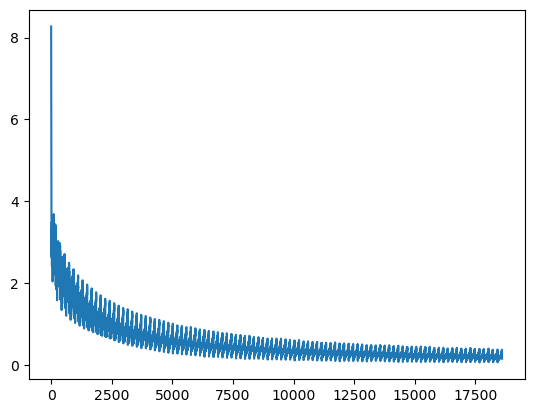

In [12]:
import matplotlib.pyplot as plt
plt.plot(record_loss)

## 模型儲存

In [13]:
torch.save(model, 'model_seq2seq.pth')
